In [18]:
import pandas as pd

df = pd.read_csv('../CRISPRGeneEffect.csv', header=0, index_col=0)
df = df.applymap(lambda x: pd.to_numeric(x, errors='coerce'))
data = df.apply(pd.to_numeric, errors='coerce')

df.head(5)

,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),AADAC (13),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
ACH-000001,-0.122637,0.025881,0.034217,-0.128082,-0.031285,0.338046,-0.006439,-0.093642,0.189186,0.042783,...,-0.131727,-0.039829,0.179405,0.283552,0.204513,-0.289724,-0.062972,0.074180,0.111244,-0.467908
ACH-000004,0.019756,-0.083640,-0.060118,-0.027417,-0.036116,-0.001056,0.312876,-0.086897,0.204434,0.188715,...,-0.170329,-0.454263,0.194583,0.098989,0.126948,0.032983,-0.410392,0.113156,0.234388,-0.088306
ACH-000005,-0.107208,-0.023211,0.200204,0.116039,-0.172227,-0.071294,0.203270,-0.127806,-0.090981,0.073349,...,-0.301695,-0.454969,-0.061959,-0.036427,0.016602,-0.201273,-0.178877,-0.055349,-0.002161,-0.186842
ACH-000007,-0.031027,-0.137850,0.067704,0.107988,0.007992,0.124945,0.049548,-0.220824,-0.165669,0.230047,...,-0.303390,-0.507272,-0.025400,0.236659,0.072010,-0.100344,-0.462160,-0.001555,-0.325964,-0.486660
ACH-000009,0.008888,-0.146566,0.084471,0.089419,0.065109,0.027841,0.087943,-0.161369,0.041121,0.136621,...,-0.255466,-0.288739,-0.037132,0.261444,-0.062391,-0.112703,-0.598698,0.095877,-0.026742,-0.320759


In [19]:
# Get the number of rows and columns
num_rows, num_cols = df.shape

# Printing the results
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 1100
Number of columns: 18443


In [20]:
min_value = data.min().min()
max_value = data.max().max()
print(f"Minimum value in the dataset: {min_value}")
print(f"Maximum value in the dataset: {max_value}")
print("Datatypes in the dataframe:")

Minimum value in the dataset: -5.632497179747052
Maximum value in the dataset: 4.387553563976993
Datatypes in the dataframe:


In [21]:
# Flatten the dataframe values, excluding NaN
all_values = df.values.flatten()
valid_values = all_values[~pd.isna(all_values)]

# Calculate mean and median
mean_value = valid_values.mean()
median_value = pd.Series(valid_values).median()

# Print the results
print(f"Mean of all values: {mean_value:.2f}")
print(f"Median of all values: {median_value:.2f}")

Mean of all values: -0.15
Median of all values: -0.04


In [22]:
# Count total NaN values in the entire dataframe
total_nan = data.isna().sum().sum()
print(f"\nTotal NaN values in the entire dataframe: {total_nan}")


Total NaN values in the entire dataframe: 739493


In [23]:
# Count NaN values in each row
nan_per_row = df.isna().sum(axis=1)

# Calculate minimum, maximum, and average number of NaN values
min_na = nan_per_row.min()
max_na = nan_per_row.max()
avg_na = nan_per_row.mean()

# Print the results
print(f"Minimum number of NaN values in a row: {min_na}")
print(f"Maximum number of NaN values in a row: {max_na}")
print(f"Average number of NaN values in a row: {avg_na:.2f}")

Minimum number of NaN values in a row: 0
Maximum number of NaN values in a row: 1095
Average number of NaN values in a row: 672.27


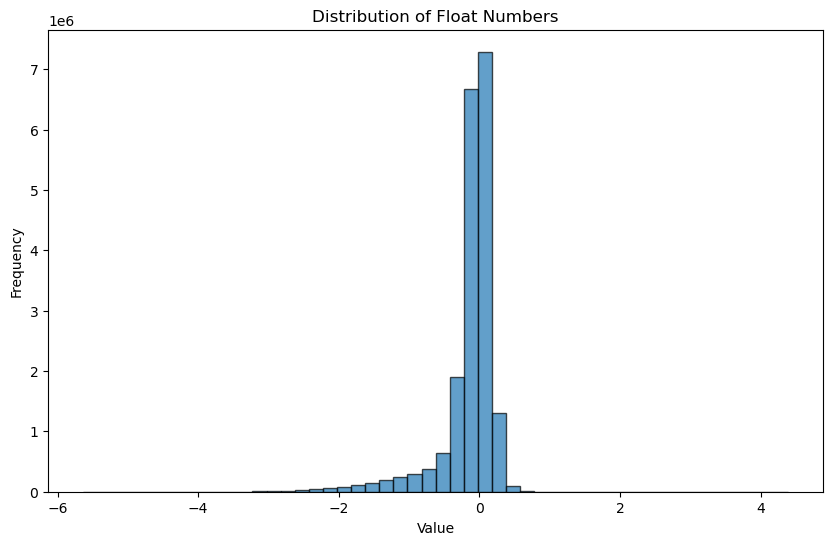

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten the DataFrame to a 1D array to plot the distribution
flattened_data = data.values.flatten()

# Remove NaN values
flattened_data = flattened_data[~pd.isnull(flattened_data)]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(flattened_data, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Float Numbers')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()